In [1]:
def f(x):
  if type(x) == int:    
    return x**4
  if type(x) == np.int64 or type(x) == np.float64: 
    return x**4
  total = 0
  for i in x:
    total += np.power(i,2)
  if total < 0:
    return 2147483647
  return total

In [2]:
import random
import numpy as np

# y = x**4

class Particle():

  def __init__(self):
    np.random.seed(100)

    self.velocity = np.array([random.randint(-100,100), random.randint(-100,100)])
    pos_x = random.randint(-100,100)
    self.best_position = np.array([pos_x, f(pos_x)])
    self.current_position = np.array([pos_x, f(pos_x)])
    self.best_error = -1

In [3]:
particles = [Particle() for i in range(20)]
global_err = -1
global_min = np.array([9999999,9999999])

w = 0.8
c1 = 0.1
c2 = 0.1
r1 = np.random.rand(2)
r2 = np.random.rand(2)

print(r1,r2)

y = []

for _ in range(1000):
  
  print(global_min, global_err)
  for p in particles:
    
    curr_err = f(p.current_position)
    if curr_err < 0:
      print("here ",p.current_position, f(p.current_position), curr_err)
    if curr_err < p.best_error or p.best_error == -1:
      p.best_error = curr_err
      p.best_position = p.current_position

    if curr_err < global_err or global_err == -1:
      global_err = curr_err
      global_min = p.current_position

  for p in particles:

    p.velocity = w*p.velocity + c1*r1*(p.best_position - p.current_position) + c2*r2*(global_min - p.current_position)
    p.current_position = p.current_position + p.velocity

  y.append(global_err)

[0.54340494 0.27836939] [0.42451759 0.84477613]
[9999999 9999999] -1
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[-1  1] 2
[1.29485403 0.55695566] 1.98684655887151
[0.51627812 0.11031524] 0.27871254884482577
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.10658261 -0.24699709] 0.07236741652036777
[-0.12

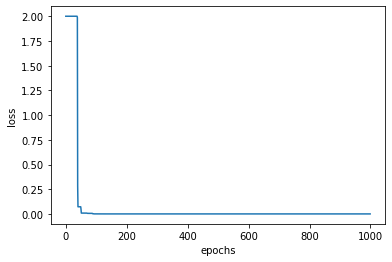

In [4]:
import matplotlib.pyplot as plt

X = [i for i in range(0,1000)]
plt.plot(X,y)

plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

pbest:  [[2.71702471 1.39184693 2.12258795 4.22388066 0.02359428 0.6078456
  3.35374542 4.12926378 0.68353295 2.87546665 4.45660977 1.04601061
  0.9266411  0.54188445 1.09848746 4.89311892 4.05841575 0.85970506
  4.08112374 1.37036874]
 [2.15852092 4.7001491  4.08824689 1.68055975 0.87705227 1.86416023
  0.02844254 1.26213177 3.97831254 0.07627486 2.99421688 3.0190227
  0.52573843 1.90971722 0.18238028 4.45205782 4.90460429 0.29970994
  4.45272972 2.8845075 ]]
pbest_obj:  [-1.60508712e-01  8.98652848e-06 -4.42655818e-02 -1.88487335e-03
 -2.27178754e-07  7.56183004e-05  5.77266130e-05  1.84370199e-03
  6.12949917e-04  7.44229953e-05 -4.34450928e-02  6.06565814e-03
 -4.10322542e-06  7.25068492e-05 -1.08327376e-06  3.86458450e-04
  2.24041796e-03 -1.06173332e-06 -1.12341502e-02  7.82250587e-03]
gbest:  [2.71702471 2.15852092]
gbest_obj:  -0.16050871235936995
PSO found best solution at f([3.14159266 3.14159265])=-1.0
Global optimal at f([3.131313131313131, 3.131313131313131])=-0.9996830426

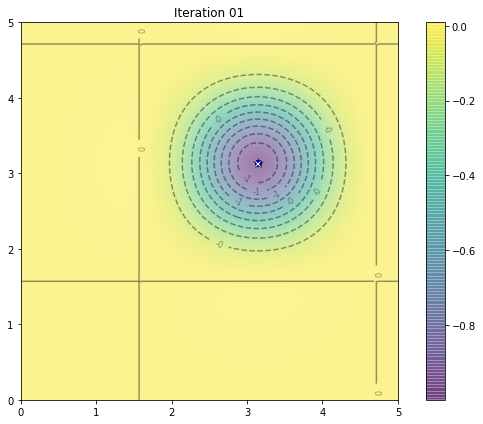

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x,y):
    "Objective function"
    # return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    # return x**4 + y**4
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))
    # return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()


print('pbest: ', pbest)
print('pbest_obj: ', pbest_obj)
print('gbest: ', gbest)
print('gbest_obj: ', gbest_obj)
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.mp4")

for i in range(100):
  update()

print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

In [ ]:
#@title Without Visualizations

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x,y):
    "Objective function"
    # return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    return x**4 + y**4

# Hyper-parameter of the algorithm
c1 = c2 = 1.49618
w = 0.7298
r1, r2 = np.random.rand(2)
 
# Create particles
n_particles = 20

all_particles = [Particle() for i in range(n_particles)]

# Initialize data

global_position = np.infty
global_position_value = np.infty
for p in all_particles:
  if p.best_position_value < global_position_value:
    global_position_value =  p.best_position_value
    global_position = p.best_position



def update():
    "Function to do one iteration of particle swarm optimization"

    global global_position, global_position_value

    for p in all_particles:


      p.velocity = w * p.velocity + c1*r1*(p.best_position - p.current_position) + c2*r2*(global_position-p.current_position)
      p.current_position = p.current_position + p.velocity

    

      new_value = f(p.current_position[0], p.current_position[1])
      


      if new_value < p.best_position_value:
        p.best_position_value = new_value
        p.best_position = p.current_position

      if p.best_position_value < global_position_value:
        global_position_value = p.best_position_value
        global_position = p.current_position


for i in range(100):
  update()
 
print("PSO found best solution at f({})={}".format(global_position, global_position_value))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

PSO found best solution at f([[-6.85476229e-09]
 [ 1.74448778e-09]])=[2.21711145e-33]
Global optimal at f([0.0, 0.0])=0.0


In [ ]:
import random
import numpy as np

# y = x**4

class Particle():

  def __init__(self):
    #np.random.seed(100)

    self.velocity =  np.random.rand(2,1)*0.1
    self.current_position = np.random.rand(2,1)*5
    self.best_position = self.current_position
    self.best_position_value = f(self.current_position[0], self.current_position[1])

In [ ]:
test = [Particle() for i in range(2)]

In [ ]:
a,b = test